In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Python 3.4 버전부터 표준 라이브러리에 포함된 모듈로, 객체 지향적인 방법으로 파일시스템 경로를 다루는 데 사용
from pathlib import Path

# xml 확장자로 저장할 수 있는 텍스트 기반 문서를 의미함. yolov5부터 txt 파일로 yolo의 박스를 인식 못해서
# xml확장자를 써야 한다.
#if 내가 txt 형태로 박스를 분류했다고 하면 roboflow에 가서 txt파일을 xml형식으로 바꾸어 주는 방법이 있다.
#parse함수란 XML 파일을 파싱하여 DOM 객체를 반환한다. 
#좀 더 쉽게 설명하면 XML 파일은 기본적으로 계층적인 구조를 가지는데, 이를 트리 구조로 가지고 온다고 생각하면 편함
from xml.dom.minidom import parse

from shutil import copyfile
#copyfile 함수는 한 파일의 내용을 다른 파일로 복사하는 역할
import json
import os
#경로에 대한 파이썬 라이브러리

In [2]:
!pip install chardet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip -qq "/content/drive/MyDrive/New_Sample (1).zip"

In [5]:
# import os
# from PIL import Image

# # 디렉토리 경로
# directory = '/content/원천데이터/TS1_시나노골드/당도A등급'  # 실제 디렉토리 경로로 변경해주세요.

# # 디렉토리 내 모든 파일에 대해
# for filename in os.listdir(directory):
#     if filename.endswith('.jpg'):
#         filepath = os.path.join(directory, filename)
#         image = Image.open(filepath)
        
#         # 새 파일 이름 생성: 기존 확장자를 .png로 변경
#         new_filename = os.path.splitext(filename)[0] + '.png'
#         new_filepath = os.path.join(directory, new_filename)
        
#         # 이미지를 png로 저장
#         image.save(new_filepath, 'PNG')
#         image.close()
        
#         # 원본 파일 삭제
#         os.remove(filepath)


In [6]:
#이건 리눇스 명령어임. 경로에 dataset파일을 생성하고 하위 경로로
#labels, images 파일을 생성하는 코드
!mkdir -p Dataset/labels
!mkdir -p Dataset/images

In [7]:
#객체로 분류하고자 하는 분류
classes = ['A','B','C']

In [8]:
def convert_annot(size , box):
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]

In [9]:
def save_txt_file(img_jpg_file_name, size, img_box):
    save_file_name = '/content/Dataset/labels/' +  img_jpg_file_name + '.txt'
    
    #file_path = open(save_file_name, "a+")
    with open(save_file_name ,'a+') as file_path:
        for box in img_box:

            cls_num = classes.index(box[0])

            new_box = convert_annot(size, box[1:])

            file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

        file_path.flush()
        file_path.close()

In [10]:
import os
import chardet

# JSON 파일의 디렉토리
json_dir_path = '/content/라벨링데이터/TL1_시나노골드'

# JPG 파일의 디렉토리
jpg_dir_path = '/content/원천데이터/TS1_시나노골드/당도A등급'

# JSON 파일의 인코딩을 확인하고, None인 경우 해당 JSON 파일과 관련된 JPG 파일 삭제
for filename in os.listdir(json_dir_path):
    if filename.endswith('.json'):
        json_file_path = os.path.join(json_dir_path, filename)
        
        # 인코딩 확인
        result = chardet.detect(open(json_file_path, 'rb').read())
        encoding = result['encoding']
        
        if encoding is None:
            # JSON 파일 삭제
            os.remove(json_file_path)
            
            # 관련된 JPG 파일 이름 생성
            jpg_file_name = os.path.splitext(filename)[0] + '.png'
            jpg_file_path = os.path.join(jpg_dir_path, jpg_file_name)
            
            # JPG 파일 존재 여부 확인 후 삭제
            if os.path.exists(jpg_file_path):
                os.remove(jpg_file_path)


In [11]:
import chardet
import os

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# JSON 파일이 있는 디렉토리
json_dir_path = '/content/라벨링데이터/TL1_시나노골드'  # 실제 JSON 파일 디렉토리를 입력해주세요.

# 디렉토리의 모든 JSON 파일에 대해 인코딩 확인
for filename in os.listdir(json_dir_path):
    if filename.endswith('.json'):
        json_file_path = os.path.join(json_dir_path, filename)
        encoding = detect_encoding(json_file_path)
        print(f"File: {filename}, Encoding: {encoding}")


File: 20210914_RGB_16.0_F02_SG_01_009_01_0_A.json, Encoding: utf-8
File: 20210914_RGB_16.2_F02_SG_01_014_01_0_A.json, Encoding: utf-8
File: 20210829_RGB_13.6_F02_SG_01_008_01_0_A.json, Encoding: utf-8
File: 20210912_RGB_16.9_F03_SG_02_023_01_0_A.json, Encoding: utf-8
File: 20210926_RGB_15.5_F03_SG_06_023_02_0_A.json, Encoding: utf-8
File: 20210926_RGB_13.4_F03_SG_04_027_02_0_A.json, Encoding: utf-8
File: 20210926_RGB_16.8_F03_SG_04_021_02_0_A.json, Encoding: utf-8
File: 20210912_RGB_17.2_F02_SG_02_011_04_0_A.json, Encoding: utf-8
File: 20210926_RGB_14.0_F03_SG_02_025_01_0_A.json, Encoding: utf-8
File: 20210913_RGB_15.3_F01_SG_01_018_01_0_A.json, Encoding: utf-8
File: 20210914_RGB_13.4_F02_SG_01_003_02_0_A.json, Encoding: utf-8
File: 20210829_RGB_14.4_F09_SG_02_007_01_0_A.json, Encoding: utf-8
File: 20210926_RGB_16.8_F03_SG_04_021_01_0_A.json, Encoding: utf-8
File: 20211003_RGB_13.4_F03_SG_07_012_04_0_A.json, Encoding: utf-8
File: 20210914_RGB_13.4_F02_SG_01_003_01_0_A.json, Encoding: u

In [12]:
import os

# 파일이 있는 디렉토리
directory_path = '/content/라벨링데이터/TL1_시나노골드'  # 실제 디렉토리 경로로 변경해주세요.

# 디렉토리에 있는 파일 수 세기
num_files = len([f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))])

print(f'There are {num_files} files in {directory_path}.')


There are 192 files in /content/라벨링데이터/TL1_시나노골드.


In [13]:
import os

# 파일이 있는 디렉토리
directory_path = '/content/원천데이터/TS1_시나노골드/당도A등급'  # 실제 디렉토리 경로로 변경해주세요.

# 디렉토리에 있는 파일 수 세기
num_files = len([f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))])

print(f'There are {num_files} files in {directory_path}.')


There are 200 files in /content/원천데이터/TS1_시나노골드/당도A등급.


In [14]:
#이건 리눇스 명령어임. 경로에 dataset파일을 생성하고 하위 경로로
#labels, images 파일을 생성하는 코드
!mkdir -p yolo_text_label

In [15]:
import json
import os

# YOLO 형식으로 변환하는 함수
def convert_to_yolo_format(data):
    class_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3}  # sugar_grade를 클래스 번호로 변환하기 위한 사전. 실제 값에 맞게 변경해주세요.
    
    # 'images' 섹션에서 이미지 너비와 높이 가져오기
    img_width = data['images']['img_width']
    img_height = data['images']['img_height']
    
    # 'annotations' 섹션에서 'sugar_grade'와 'bbox' 정보 가져오기
    sugar_grade = data['annotations']['sugar_grade']
    bbox = data['annotations']['bbox']
    
    # sugar_grade를 클래스 번호로 변환
    obj_class = class_dict[sugar_grade]
    
    # bbox 좌표를 YOLO 형식으로 변환: 이미지의 너비와 높이로 정규화
    x_center = (bbox[0] + bbox[2] / 2) / img_width
    y_center = (bbox[1] + bbox[3] / 2) / img_height
    width = bbox[2] / img_width
    height = bbox[3] / img_height
    
    return obj_class, x_center, y_center, width, height

# JSON 파일 불러오는 함수
def load_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# JSON 파일을 YOLO 형식으로 변환하고 .txt 파일로 저장하는 함수
def convert_and_save(json_file_path, save_dir):
    data = load_json_file(json_file_path)
    obj_class, x_center, y_center, width, height = convert_to_yolo_format(data)
    
    save_file_name = os.path.join(save_dir, os.path.splitext(os.path.basename(json_file_path))[0] + '.txt')
    with open(save_file_name, 'w') as file:
        file.write(f"{obj_class} {x_center} {y_center} {width} {height}\n")

# JSON 파일이 있는 디렉토리
json_dir_path = '/content/라벨링데이터/TL1_시나노골드'  # 실제 JSON 파일 디렉토리를 입력해주세요.

# YOLO 형식의 .txt 파일을 저장할 디렉토리
save_dir = '/content/yolo_text_label'

# JSON 디렉토리의 모든 JSON 파일에 대해 처리
for filename in os.listdir(json_dir_path):
    if filename.endswith('.json'):
        json_file_path = os.path.join(json_dir_path, filename)
        convert_and_save(json_file_path, save_dir)


In [16]:
import os
import shutil
import numpy as np

# 파일이 있는 디렉토리
img_dir = '/content/원천데이터/TS1_시나노골드/당도A등급'
label_dir = '/content/yolo_text_label'

# 파일을 저장할 디렉토리
dst_img_dir = '/content/Dataset/images'
dst_label_dir = '/content/Dataset/labels'

# train, test, val 디렉토리 생성
for dir in ['train', 'test', 'val']:
    os.makedirs(os.path.join(dst_img_dir, dir), exist_ok=True)
    os.makedirs(os.path.join(dst_label_dir, dir), exist_ok=True)

# 모든 jpg 파일에 대해
for filename in os.listdir(img_dir):
    if filename.endswith('.jpg'):
        basename = os.path.splitext(filename)[0]
        
        # 라벨 파일이 있는 경우에만
        if os.path.isfile(os.path.join(label_dir, basename + '.txt')):
            # 랜덤 선택으로 분할
            rand = np.random.rand()
            if rand < 0.7:
                subdir = 'train'
            elif rand < 0.9:
                subdir = 'test'
            else:
                subdir = 'val'
            
            # 이미지 파일과 라벨 파일을 해당 디렉토리로 복사
            shutil.copy(os.path.join(img_dir, filename), os.path.join(dst_img_dir, subdir, filename))
            shutil.copy(os.path.join(label_dir, basename + '.txt'), os.path.join(dst_label_dir, subdir, basename + '.txt'))


In [17]:
!ls /content/Dataset/labels

test  train  val


In [18]:
import os

base_dir = '/content/Dataset/labels'

# 'train', 'test', 'val' 폴더에 대해
for dir in ['train', 'test', 'val']:
    dir_path = os.path.join(base_dir, dir)
    
    if os.path.exists(dir_path):
        # 디렉토리의 파일 수를 센다.
        num_files = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
        
        print(f"The number of files in '{dir}': {num_files}")
    else:
        print(f"The directory '{dir}' does not exist.")


The number of files in 'train': 134
The number of files in 'test': 43
The number of files in 'val': 15


In [19]:
!git clone https://github.com/ultralytics/ultralytics
!pip install ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 8411, done.
remote: Counting objects: 100% (522/522), done.
remote: Compressing objects: 100% (318/318), done.
remote: Total 8411 (delta 268), reused 400 (delta 204), pack-reused 7889
Receiving objects: 100% (8411/8411), 5.97 MiB | 15.83 MiB/s, done.
Resolving deltas: 100% (5588/5588), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 28.4 MB/s eta 0:00:00


In [20]:
import yaml

# Create configuration
config = {
   "path": "/content/Dataset/images",
   "train": "train",
   "val": "val",
   "test": "test",
   "nc": 3,
   "class_names": ["A", "B", "C"]
}

with open("data.yaml", "w") as file:
   yaml.dump(config, file, default_flow_style=False)


In [21]:
!cat data.yaml

class_names:
- A
- B
- C
nc: 3
path: /content/Dataset/images
test: test
train: train
val: val


In [22]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=cf169b2942244584a91e94e44d4e2da3c28a51ad231a0598e751b157bbc98bd1
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [23]:
!wandb disabled

W&B disabled.


In [24]:
!yolo task=detect mode=train data=data.yaml model=yolov8s.pt epochs=20 lr0=0.01

100% 21.5M/21.5M [00:01<00:00, 19.2MB/s]
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

In [25]:
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

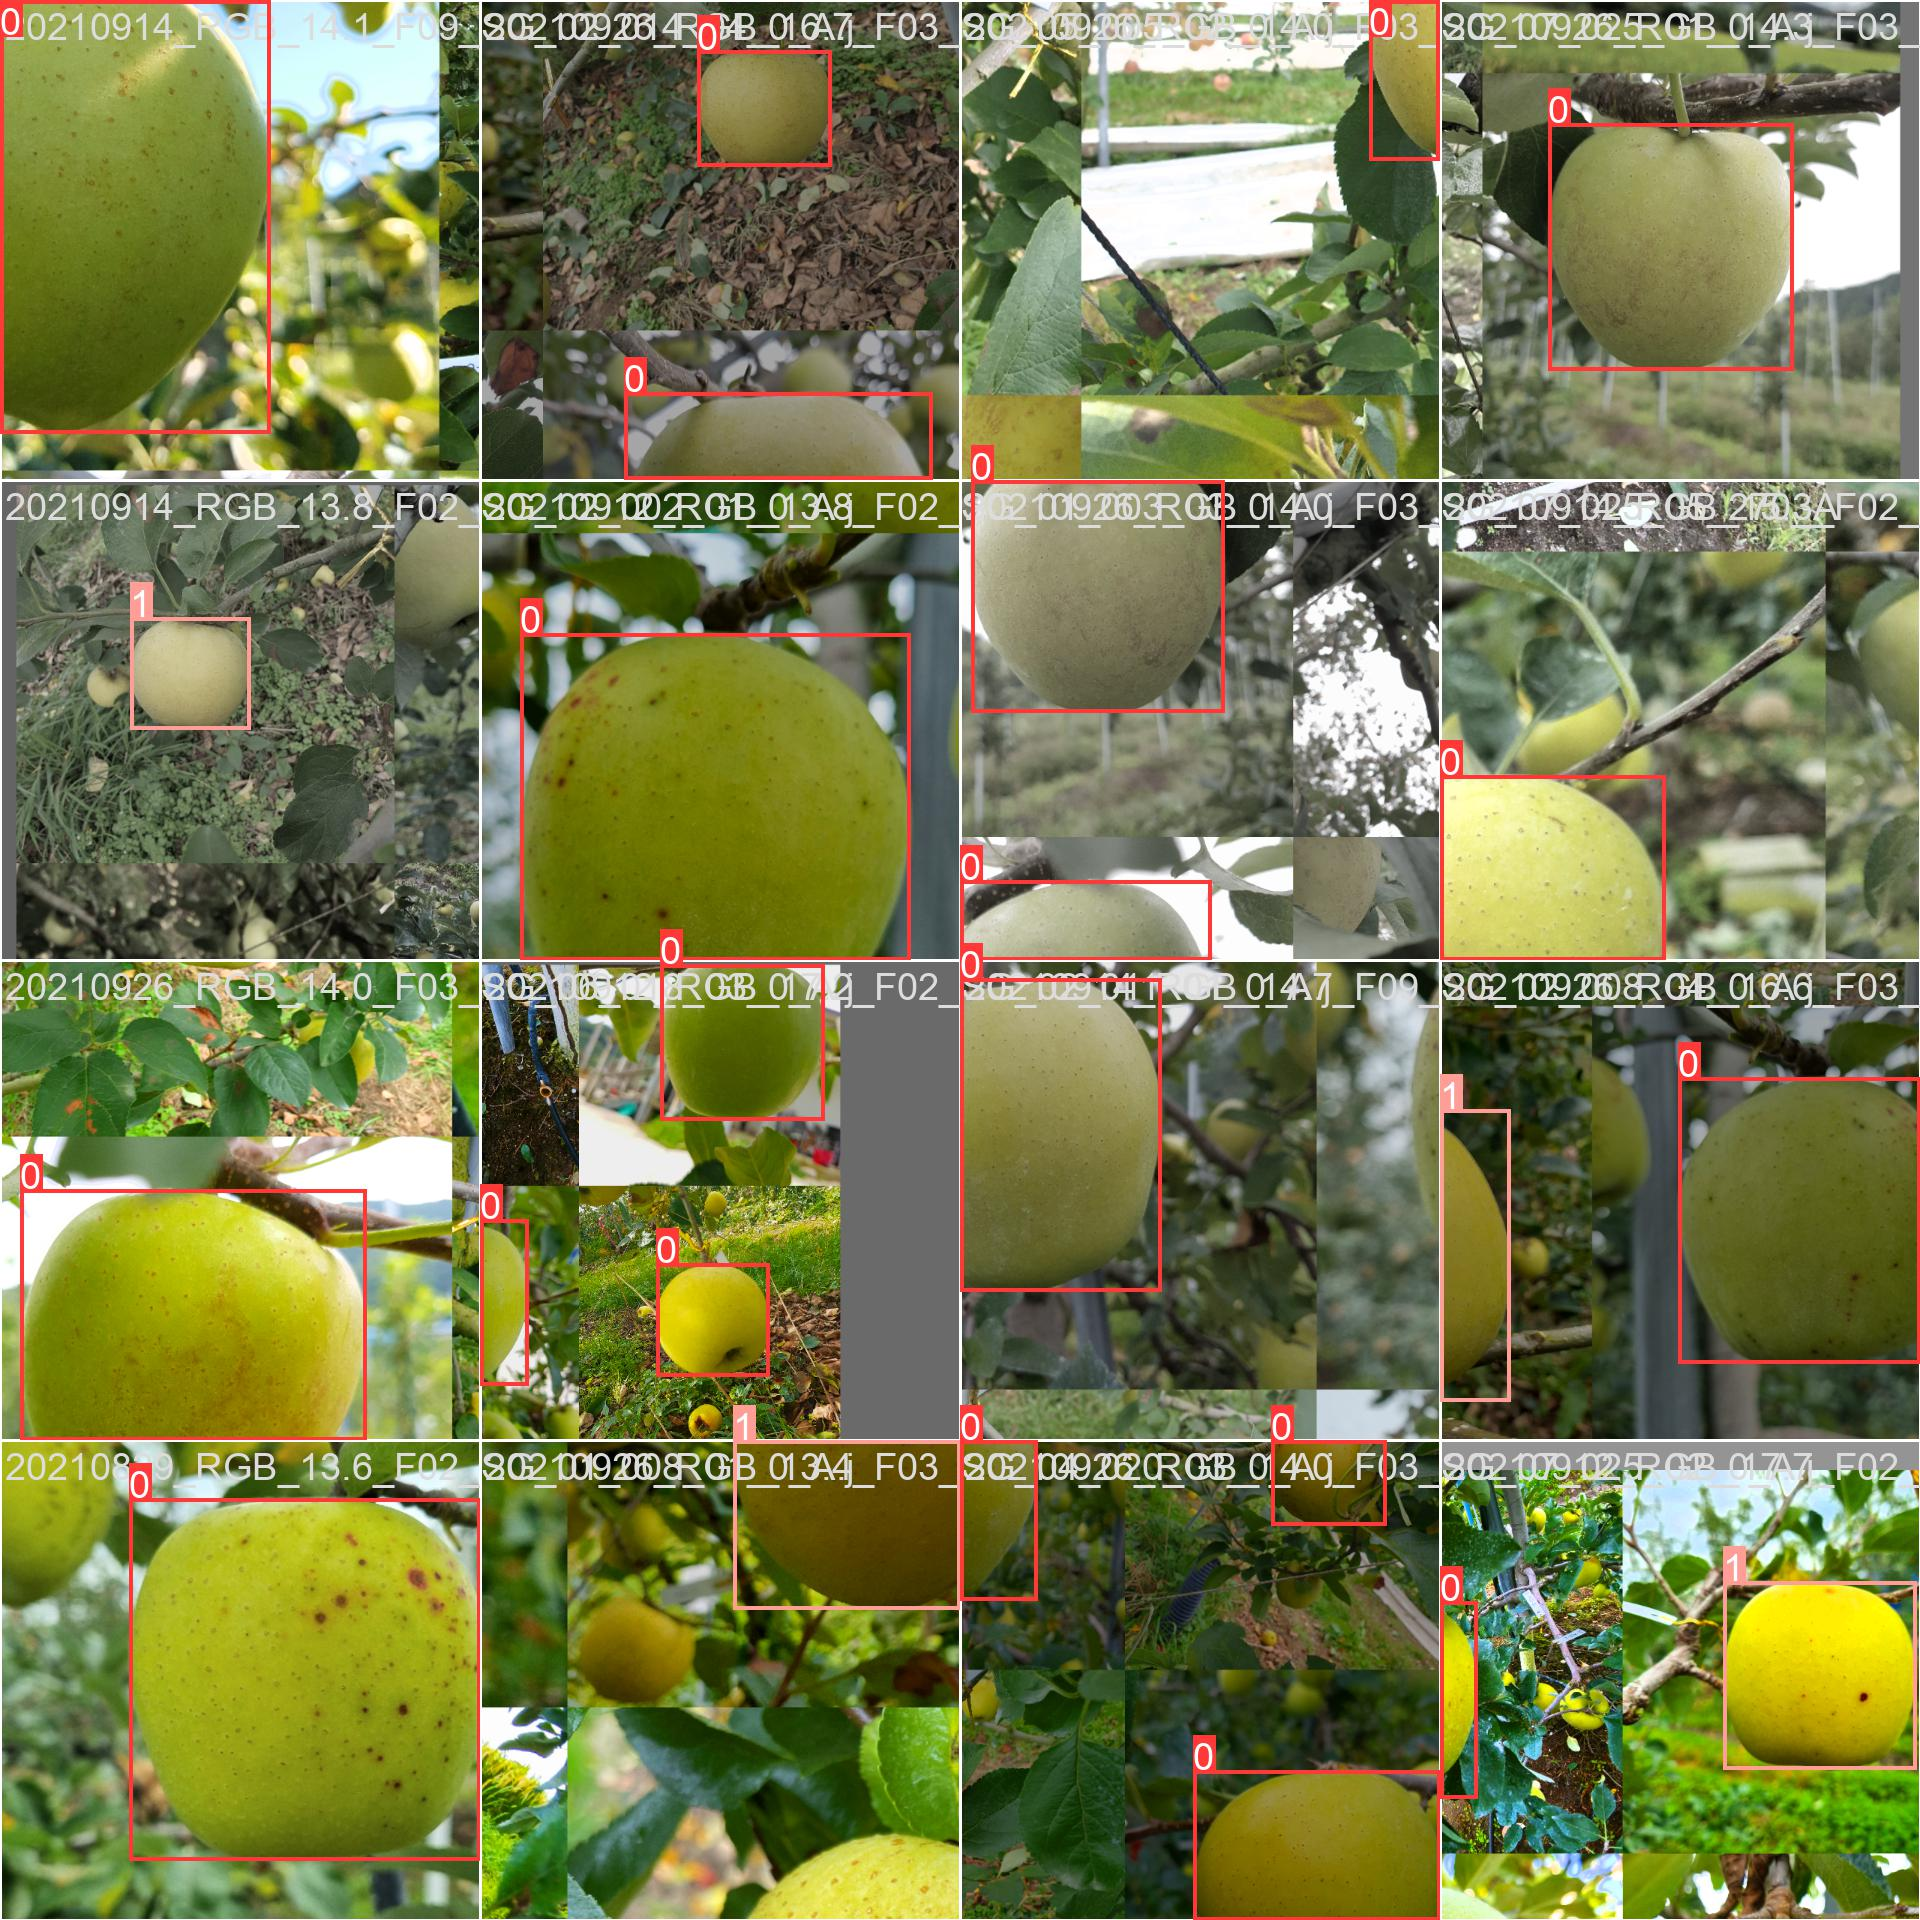

In [28]:
Image(filename='/content/runs/detect/train/train_batch0.jpg', width=500)